In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

g:\anaconda\envs\my_tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

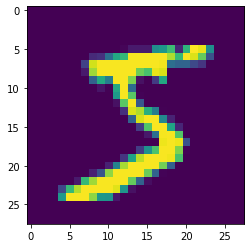

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
only_zeros = X_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

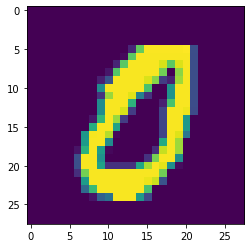

In [9]:
plt.imshow(only_zeros[10])

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [11]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(150,activation='relu'))

discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [12]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation="relu"))
generator.add(Dense(784,activation="relu"))
generator.add(Reshape([28,28]))

In [13]:
GAN = Sequential([generator,discriminator])

In [14]:
discriminator.trainable = False

In [15]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
batch_size = 32

In [18]:
my_data = only_zeros

In [19]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [20]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [21]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [22]:
epochs = 1

In [23]:
GAN

In [25]:
GAN.layers[0].layers

In [27]:
GAN.layers[1].layers

In [31]:
generator,discriminator = GAN.layers 


for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i=0
    
    for X_batch in dataset:
        i=i+1
        
        if i%100 == 0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")
            pass
        
        noise = tf.random.normal(shape=[batch_size,codings_size])
        
        gen_images = generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(X_fake_vs_real,y1)
        
        
        noise = tf.random.normal(shape=[batch_size,codings_size])
        
        y2 = tf.constant([[1.0]]*batch_size)
        
        discriminator.trainable = False
        
        GAN.train_on_batch(noise,y2)

Currently on Epoch 1
	 Currently on batch number 100 of 185


In [32]:
nosie = tf.random.normal(shape=[10,codings_size])

In [33]:
noise.shape

TensorShape([32, 100])

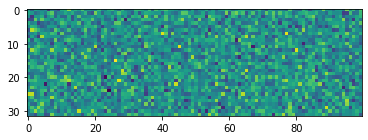

In [34]:
plt.imshow(noise)

In [35]:
images = generator(noise)

In [36]:
images.shape

TensorShape([32, 28, 28])

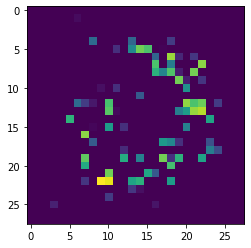

In [37]:
plt.imshow(images[0])

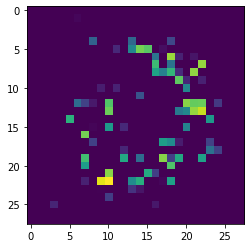

In [40]:
plt.imshow(images[2])